In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

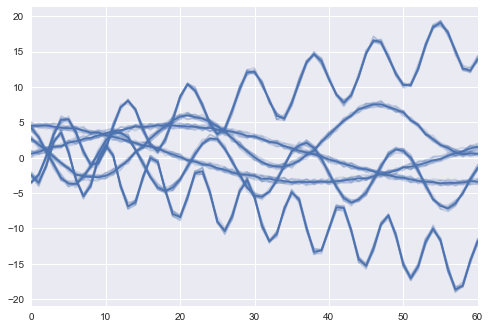

In [5]:
# Build 6 time series groups for testing, called: a,b,c,d,e,f

num_samples = 61
group_size= 10

# create the main time series for each group

x = np.linspace(0,5, num_samples)
scale = 4

a = scale * np.sin(x)
b = scale*(np.cos(1+x*3) + np.linspace(0,1, num_samples))
c = scale*(np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale*(np.cos(3+x*9) + np.linspace(0,4, num_samples))
e = scale*(np.sin(4+x*12) + np.linspace(0,-4,num_samples))
f = scale*np.cos(x)

#from each main series build 'group_size' series

timeSeries = pd.DataFrame()
ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) 
    + np.random.randn(group_size,1)
    df = pd.DataFrame(arr)
    timeSeries = timeSeries.append(df)
    
    ax = sns.tsplot(ax = ax, data= df.values, err_style="unit_traces")
    
plt.show()

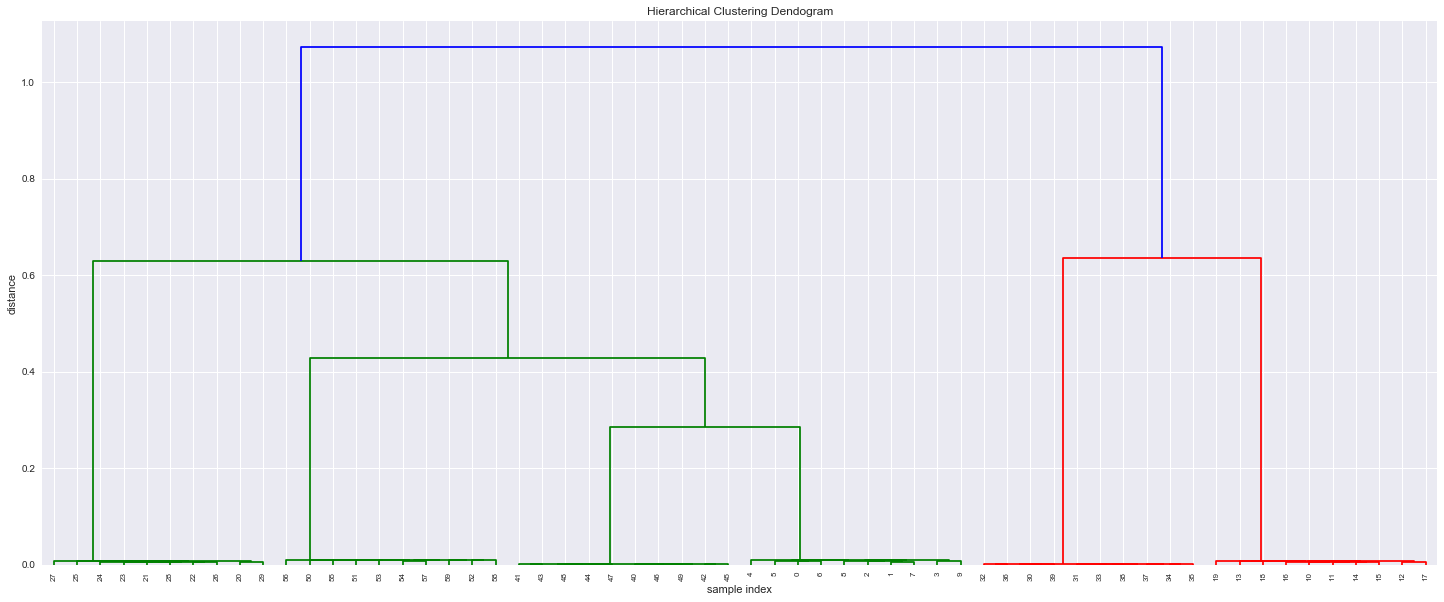

In [8]:
#do the clustering
Z = hac.linkage(timeSeries, method = 'single', metric = 'correlation')

#Plot dendogram
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z, 
    leaf_rotation = 90., #rotates the x axis labels
    leaf_font_size = 8., #font size for the x axis labels
)
plt.show()

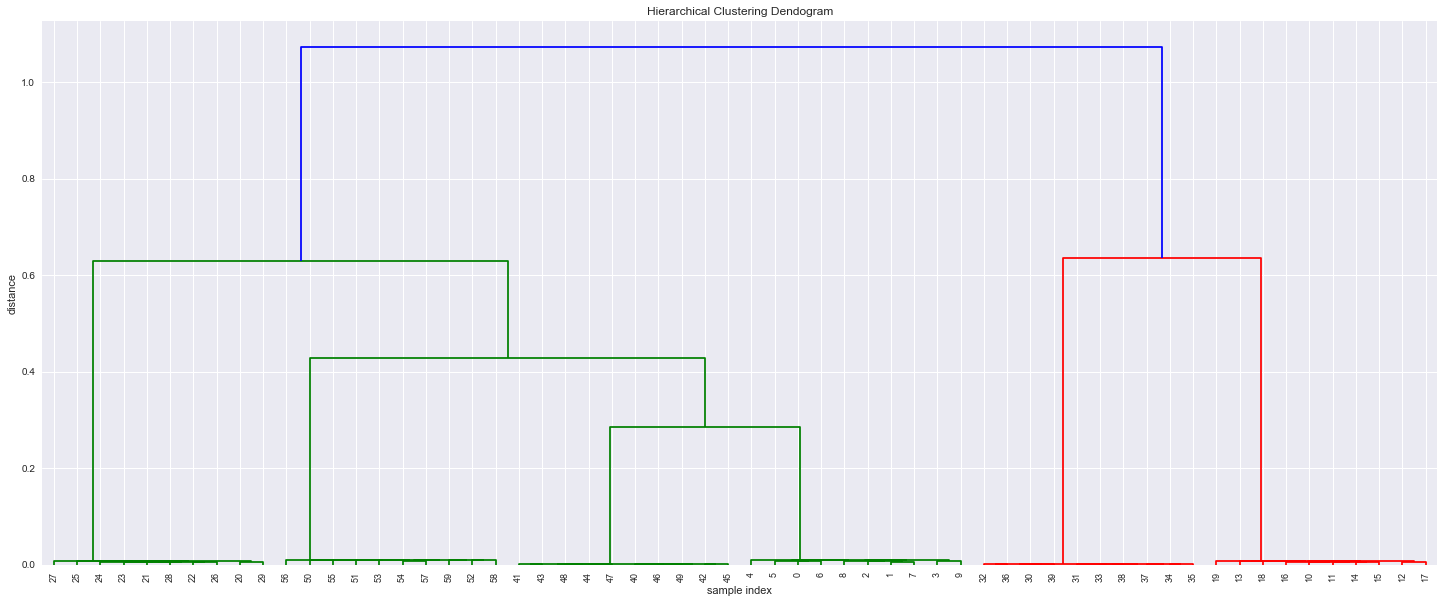

In [11]:
#change metric
def my_metric(x,y):
    r = stats.pearsonr(x,y)[0]
    return 1-r #correlation to distance: range 0 to 2

#DO the clustering
Z = hac.linkage(timeSeries, method = 'single', metric = my_metric)

#Plot dendogram
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation = 90.,
    leaf_font_size = 9.,
)
plt.show()

In [13]:
#retrieve the cluster using fcluster function
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot = False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion = 'maxclust')
    
    #check the results
    s = pd.Series(results)
    clusters = s.unique()
    
    for c in clusters:
        cluster_indices = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indices)))
        
        if plot:
            timeSeries.T.iloc[:,cluster_indices].plot()
            plt.show()
print_clusters(timeSeries, Z, 6, plot=False)

Cluster 4 number of entries 10
Cluster 6 number of entries 10
Cluster 1 number of entries 10
Cluster 5 number of entries 10
Cluster 3 number of entries 10
Cluster 2 number of entries 10
